<a href="https://colab.research.google.com/github/LigiaKaczmarek/Uczenie-Maszynowe-w-finansach/blob/main/Case_3_LK.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

[*********************100%%**********************]  1 of 1 completed
<ipython-input-7-c6578d458589>:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['Signal'] = np.where(data['Return'] > 0, 1, 0)
[*********************100%%**********************]  1 of 1 completed

Najlepsze parametry: {'max_depth': 20, 'min_samples_leaf': 2, 'min_samples_split': 5, 'n_estimators': 50}



<ipython-input-7-c6578d458589>:64: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test_data['Predicted_Signal'] = best_model.predict(test_data[['Lag1', 'Lag2']])
<ipython-input-7-c6578d458589>:67: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test_data['Signal'] = np.where(test_data['Return'] > 0, 1, 0)
<ipython-input-7-c6578d458589>:70: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the 

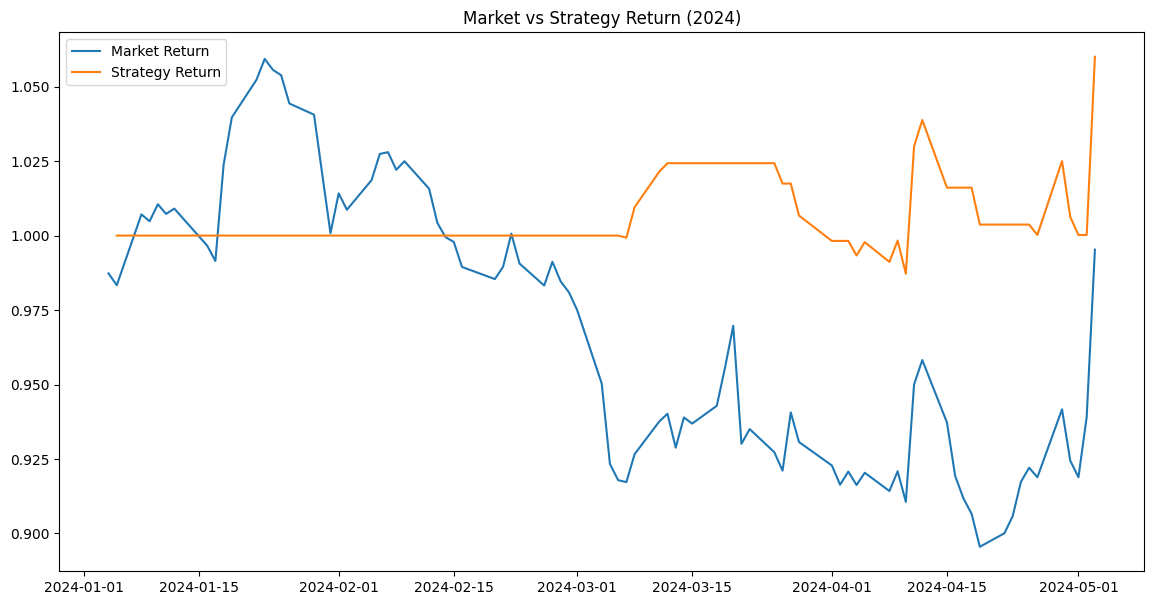

Dokładność modelu na danych testowych: 0.60


In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import accuracy_score
import yfinance as yf

# Pobranie danych historycznych dla AAPL
ticker = 'AAPL'
start_date = '2020-01-01'
end_date = '2023-12-31'
data = yf.download(ticker, start=start_date, end=end_date)

# Przetwarzanie danych
data['Return'] = data['Close'].pct_change()
data['Lag1'] = data['Close'].shift(1)
data['Lag2'] = data['Close'].shift(2)
data = data.dropna()

# Definiowanie zmiennej docelowej
data['Signal'] = np.where(data['Return'] > 0, 1, 0)

# Podzielenie danych na zestawy treningowy i testowy
X = data[['Lag1', 'Lag2']]
y = data['Signal']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, shuffle=False)

# Definiowanie siatki parametrów dla GridSearchCV
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Inicjalizacja modelu Random Forest
rf = RandomForestClassifier(random_state=42)

# Inicjalizacja GridSearchCV
grid_search = GridSearchCV(estimator=rf, param_grid=param_grid, cv=5, n_jobs=-1, scoring='accuracy')

# Dopasowanie GridSearchCV
grid_search.fit(X_train, y_train)

# Uzyskanie najlepszych parametrów i modelu
best_model = grid_search.best_estimator_
best_params = grid_search.best_params_

print(f"Najlepsze parametry: {best_params}")

# Pobranie danych dla okresu testowego
test_start_date = '2024-01-01'
test_end_date = '2024-05-06'
test_data = yf.download(ticker, start=test_start_date, end=test_end_date)

# Przetwarzanie danych testowych
test_data['Return'] = test_data['Close'].pct_change()
test_data['Lag1'] = test_data['Close'].shift(1)
test_data['Lag2'] = test_data['Close'].shift(2)
test_data = test_data.dropna()

# Generowanie predykcji i sygnałów
test_data['Predicted_Signal'] = best_model.predict(test_data[['Lag1', 'Lag2']])

# Dodanie kolumny 'Signal' do danych testowych
test_data['Signal'] = np.where(test_data['Return'] > 0, 1, 0)

# Generowanie sygnałów kupna/sprzedaży
test_data['Strategy_Return'] = test_data['Return'] * test_data['Predicted_Signal'].shift(1)

# Backtest strategii
test_data['Cumulative_Market_Return'] = (1 + test_data['Return']).cumprod()
test_data['Cumulative_Strategy_Return'] = (1 + test_data['Strategy_Return']).cumprod()

# Wizualizacja wyników
plt.figure(figsize=(14, 7))
plt.plot(test_data['Cumulative_Market_Return'], label='Market Return')
plt.plot(test_data['Cumulative_Strategy_Return'], label='Strategy Return')
plt.title('Market vs Strategy Return (2024)')
plt.legend()
plt.show()

# Ocena dokładności modelu
test_accuracy = accuracy_score(test_data['Signal'], test_data['Predicted_Signal'])
print(f"Dokładność modelu na danych testowych: {test_accuracy:.2f}")


Wyjaśnienie:

**Pobranie i przetworzenie danych:** Pobierane sa dane historyczne dla AAPL od 2020-01-01 do 2023-12-31 i przygotowuje cechy do modelu.

**Wybór modelu i optymalizacja hiperparametrów:** Używam GridSearchCV do optymalizacji hiperparametrów modelu Random Forest.

**Generowanie sygnałów kupna/sprzedaży:** Używam wytrenowanego modelu do generowania sygnałów na danych testowych.

**Backtest strategii:** Przeprowadzam backtest, obliczając skumulowane zwroty strategii i rynkowe.

**Wizualizacja wyników:** Wizualizuje skumulowane zwroty strategii i rynkowe oraz oceniamy dokładność modelu na danych testowych.